In [1]:
from FlowCytometryTools import FCMeasurement, ThresholdGate, PolyGate
from os.path import join
from pylab import *
import pandas as pd
import numpy as np

# Lung sample 2.2

In [2]:
# https://eyurtsev.github.io/FlowCytometryTools/API/FlowCytometryTools.FCMeasurement.html#FlowCytometryTools.FCMeasurement

In [3]:
sample_id = "lung_2_2"

In [4]:
fc_file = join("data", sample_id, "flowcore", f"{sample_id}.fcs")
sample = FCMeasurement(ID=sample_id, datafile=fc_file)

In [5]:
sample.get_data()

,DAPI_1_cellMask,GFP.KP1.9_cellMask,CD206_cellMask,BODIPY630.NP_cellMask,DAPI_2_cellMask,Arg1_cellMask,CD11c_cellMask,CD45_cellMask,DAPI_3_cellMask,C12.D.nanoparticle_cellMask,...,Y_centroid,column_centroid,row_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
0,5249.0,2699.0,3026.0,1936.0,0.0,0.0,0.0,0.0,6172.0,3714.0,...,4.266667,4.533333,4.266667,15.0,5.202077,3.766011,0.689859,1.0,0.750000,-1.193717
1,5249.0,2699.0,3026.0,1936.0,0.0,0.0,0.0,0.0,6172.0,3714.0,...,3.625000,15.000000,3.625000,8.0,4.898980,1.936492,0.918559,1.0,0.800000,1.570796
2,5249.0,2699.0,3026.0,1936.0,0.0,0.0,0.0,0.0,6172.0,3714.0,...,3.500000,26.000000,3.500000,2.0,2.000000,0.000000,1.000000,1.0,1.000000,0.000000
3,5249.0,2699.0,3026.0,1936.0,0.0,0.0,0.0,0.0,6172.0,3714.0,...,3.000000,41.500000,3.000000,2.0,2.000000,0.000000,1.000000,1.0,1.000000,1.570796
4,5249.0,2699.0,3026.0,1936.0,0.0,0.0,0.0,0.0,6172.0,3714.0,...,3.000000,47.000000,3.000000,1.0,0.000000,0.000000,0.000000,1.0,1.000000,0.785398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,5249.0,2699.0,3026.0,1936.0,0.0,0.0,0.0,250.0,6172.0,3714.0,...,555.000000,3.000000,555.000000,1.0,0.000000,0.000000,0.000000,1.0,1.000000,0.785398
2927,18240.0,6052.0,18501.0,6997.0,0.0,0.0,0.0,0.0,19261.0,14877.0,...,555.000000,511.000000,555.000000,1.0,0.000000,0.000000,0.000000,1.0,1.000000,0.785398
2928,5249.0,2699.0,3026.0,1936.0,0.0,0.0,0.0,0.0,6172.0,3714.0,...,560.000000,3.000000,560.000000,1.0,0.000000,0.000000,0.000000,1.0,1.000000,0.785398
2929,5249.0,2699.0,3026.0,1936.0,0.0,0.0,0.0,0.0,6172.0,3714.0,...,571.599976,3.800000,571.599976,5.0,3.098387,1.788854,0.816497,1.0,0.833333,1.249046


In [6]:
print(sample.channel_names)

('DAPI_1_cellMask', 'GFP.KP1.9_cellMask', 'CD206_cellMask', 'BODIPY630.NP_cellMask', 'DAPI_2_cellMask', 'Arg1_cellMask', 'CD11c_cellMask', 'CD45_cellMask', 'DAPI_3_cellMask', 'C12.D.nanoparticle_cellMask', 'X7C1.F5.nanoparticle_cellMask', 'G0.P5.nanoparticle_cellMask', 'X_centroid', 'Y_centroid', 'column_centroid', 'row_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation')


In [7]:
tsample = sample.transform('hlog', channels=['DAPI_1_cellMask'], b=500.0)

In [65]:
gfp_pos_gate = PolyGate([(20000, 16000), (62000, 16000), (62000, 50000), (20000, 50000)], channels=['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], region='in', name='GFP+ Tumor')
gfp_neg_gate = PolyGate([(20000, 0), (60000, 0), (60000, 9000), (20000, 9000)], channels=['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], region='in', name='GFP- Host')

# Host (slide 1)
gfp_neg_cd45_pos_cd206_pos_gate = PolyGate([(190, 15000), (400, 15000), (400, 30000), (190, 30000)], channels=['CD45_cellMask', 'CD206_cellMask'], region='in', name='CD45+CD206+')
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate = PolyGate([(580, 380), (1200, 380), (1200, 700), (580, 700)], channels=['Arg1_cellMask', 'CD11c_cellMask'], region='in', name='CD11c+Arg1+')

# Tumor (slide 2)
gfp_pos_cd45_neg_cd206_neg_gate = PolyGate([(0, 0), (7000, 0), (7000, 13750), (0, 13750)], channels=['CD45_cellMask', 'CD206_cellMask'], region='in', name='CD45-CD206-')
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate = PolyGate([(0, 0), (450, 0), (450, 350), (0, 350)], channels=['Arg1_cellMask', 'CD11c_cellMask'], region='in', name='CD11c-Arg1-')

In [66]:
figure();

<Figure size 432x288 with 0 Axes>

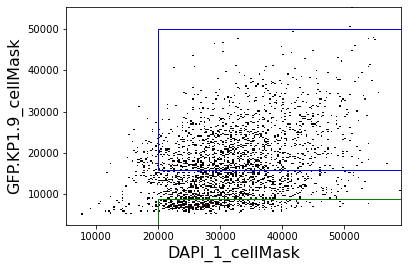

In [67]:
sample.plot(['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], gates=[gfp_pos_gate, gfp_neg_gate]);

In [68]:
gfp_pos_gated_sample = sample.gate(gfp_pos_gate)
gfp_neg_gated_sample = sample.gate(gfp_neg_gate)

In [69]:
gfp_neg_gated_sample.counts

501

## GFP- Host

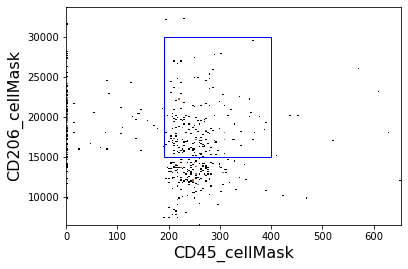

In [70]:
gfp_neg_gated_sample.plot(['CD45_cellMask', 'CD206_cellMask'], gates=[gfp_neg_cd45_pos_cd206_pos_gate]);

In [71]:
gfp_neg_cd45_pos_cd206_pos_gated_sample = gfp_neg_gated_sample.gate(gfp_neg_cd45_pos_cd206_pos_gate)

In [72]:
gfp_neg_cd45_pos_cd206_pos_gated_sample.counts

176

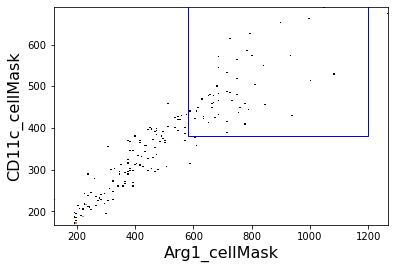

In [73]:
gfp_neg_cd45_pos_cd206_pos_gated_sample.plot(['Arg1_cellMask', 'CD11c_cellMask'], gates=[gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate]);

In [74]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample = gfp_neg_cd45_pos_cd206_pos_gated_sample.gate(gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate)

In [75]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample.counts

49

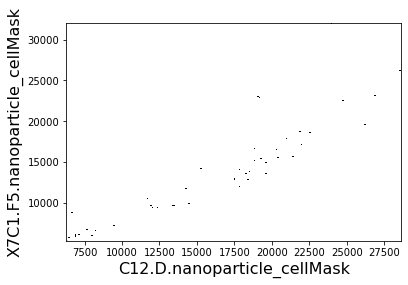

In [76]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample.plot(['C12.D.nanoparticle_cellMask', 'X7C1.F5.nanoparticle_cellMask']);

## GFP+ Tumor

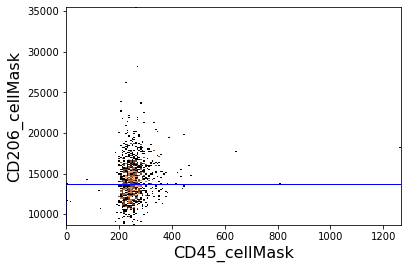

In [77]:
gfp_pos_gated_sample.plot(['CD45_cellMask', 'CD206_cellMask'], gates=[gfp_pos_cd45_neg_cd206_neg_gate]);

In [78]:
gfp_pos_cd45_neg_cd206_neg_gated_sample = gfp_pos_gated_sample.gate(gfp_pos_cd45_neg_cd206_neg_gate)

In [79]:
gfp_pos_cd45_neg_cd206_neg_gated_sample.counts

565

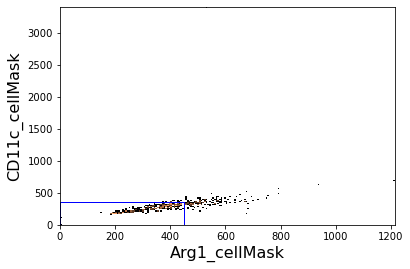

In [80]:
gfp_pos_cd45_neg_cd206_neg_gated_sample.plot(['Arg1_cellMask', 'CD11c_cellMask'], gates=[gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate]);

In [81]:
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample = gfp_pos_cd45_neg_cd206_neg_gated_sample.gate(gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate)

In [82]:
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample.counts

370

In [83]:
def classify_cells(sample, class_to_df):
    df = pd.DataFrame(index=sample.get_data().index.values.tolist(), columns=[], data=[])
    for cell_class_name, cell_class_sample in class_to_df.items():
        cells = cell_class_sample.get_data().index.values.tolist()
        df[cell_class_name] = df.index.to_series().apply(lambda i: i in cells)
    
    return df

In [84]:
df = classify_cells(sample, {
    "GFP-": gfp_neg_gated_sample,
    "GFP-/CD45+CD206+": gfp_neg_cd45_pos_cd206_pos_gated_sample,
    "GFP-/CD45+CD206+/CD11c+Arg1+": gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample,
    "GFP+": gfp_pos_gated_sample,
    "GFP+/CD45-CD206-": gfp_pos_cd45_neg_cd206_neg_gated_sample,
    "GFP+/CD45-CD206-/CD11c-Arg1-": gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample,
})

df.to_csv(join("data", sample_id, "flowcore", f"{sample_id}.classes.csv"), index=True)

In [85]:
writer = pd.ExcelWriter(join("data", sample_id, "flowcore", f"{sample_id}.classes.xlsx"))

for col in df.columns.values.tolist():
    sample.get_data().loc[df[col]].to_excel(writer, sheet_name=col.replace("/", " "))

writer.save()